In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
data= pd.read_csv('E-commerce_NPA_Dataset.csv')
print(data.head())

   CustomerID  Age  Gender  PurchaseAmount  PurchaseFrequency  \
0           1   38  Female      749.097626                 24   
1           2   30    Male      735.224916                 18   
2           3   55    Male     1145.520305                 22   
3           4   39  Female      925.460535                 14   
4           5   51    Male      108.359916                  9   

   ProductQualityRating  DeliveryTimeRating  CustomerServiceRating  \
0                     2                   1                      3   
1                     5                   4                      4   
2                     3                   5                      4   
3                     4                   3                      2   
4                     3                   3                      2   

   WebsiteEaseOfUseRating  ReturnRate  DiscountUsage LoyaltyProgramMember  
0                       5        0.12     135.392573                   No  
1                       5        0.3

In [33]:
# lets look at the summary statistic of the data
print(data.describe())

       CustomerID         Age  PurchaseAmount  PurchaseFrequency  \
count  500.000000  500.000000      500.000000         500.000000   
mean   250.500000   44.170000     1065.050731          14.308000   
std    144.481833   14.813777      583.199658           8.151197   
min      1.000000   18.000000       51.799790           1.000000   
25%    125.750000   32.000000      535.083407           7.000000   
50%    250.500000   44.000000     1100.884065          14.000000   
75%    375.250000   58.000000     1584.348124          22.000000   
max    500.000000   69.000000     1999.655968          29.000000   

       ProductQualityRating  DeliveryTimeRating  CustomerServiceRating  \
count             500.00000          500.000000               500.0000   
mean                2.93400            3.008000                 3.0780   
std                 1.41054            1.372481                 1.4156   
min                 1.00000            1.000000                 1.0000   
25%              

In [34]:
print(data.describe())

       CustomerID         Age  PurchaseAmount  PurchaseFrequency  \
count  500.000000  500.000000      500.000000         500.000000   
mean   250.500000   44.170000     1065.050731          14.308000   
std    144.481833   14.813777      583.199658           8.151197   
min      1.000000   18.000000       51.799790           1.000000   
25%    125.750000   32.000000      535.083407           7.000000   
50%    250.500000   44.000000     1100.884065          14.000000   
75%    375.250000   58.000000     1584.348124          22.000000   
max    500.000000   69.000000     1999.655968          29.000000   

       ProductQualityRating  DeliveryTimeRating  CustomerServiceRating  \
count             500.00000          500.000000               500.0000   
mean                2.93400            3.008000                 3.0780   
std                 1.41054            1.372481                 1.4156   
min                 1.00000            1.000000                 1.0000   
25%              


1. Age: The average customer age is around 44 years, with a range from 18 to 69 years.
2. Purchase Amount: The average purchase amount is $1065, with a significant standard deviation indicating variability in spending.
3. Purchase Frequency: Customers purchase on average about 14 times, with some making up to 29 purchases.
 4. Ratings: The average ratings for product quality, delivery time, customer service, and website ease of use are around 3, indicating moderate
 5. satisfaction levels. These ratings range from 1 (poor) to 5 (excellent).
6. Return Rate: The average return rate is 25%, with some customers having a return rate as high as 50%.
7. Discount Usage: The average discount usage is around $251, with high variability.


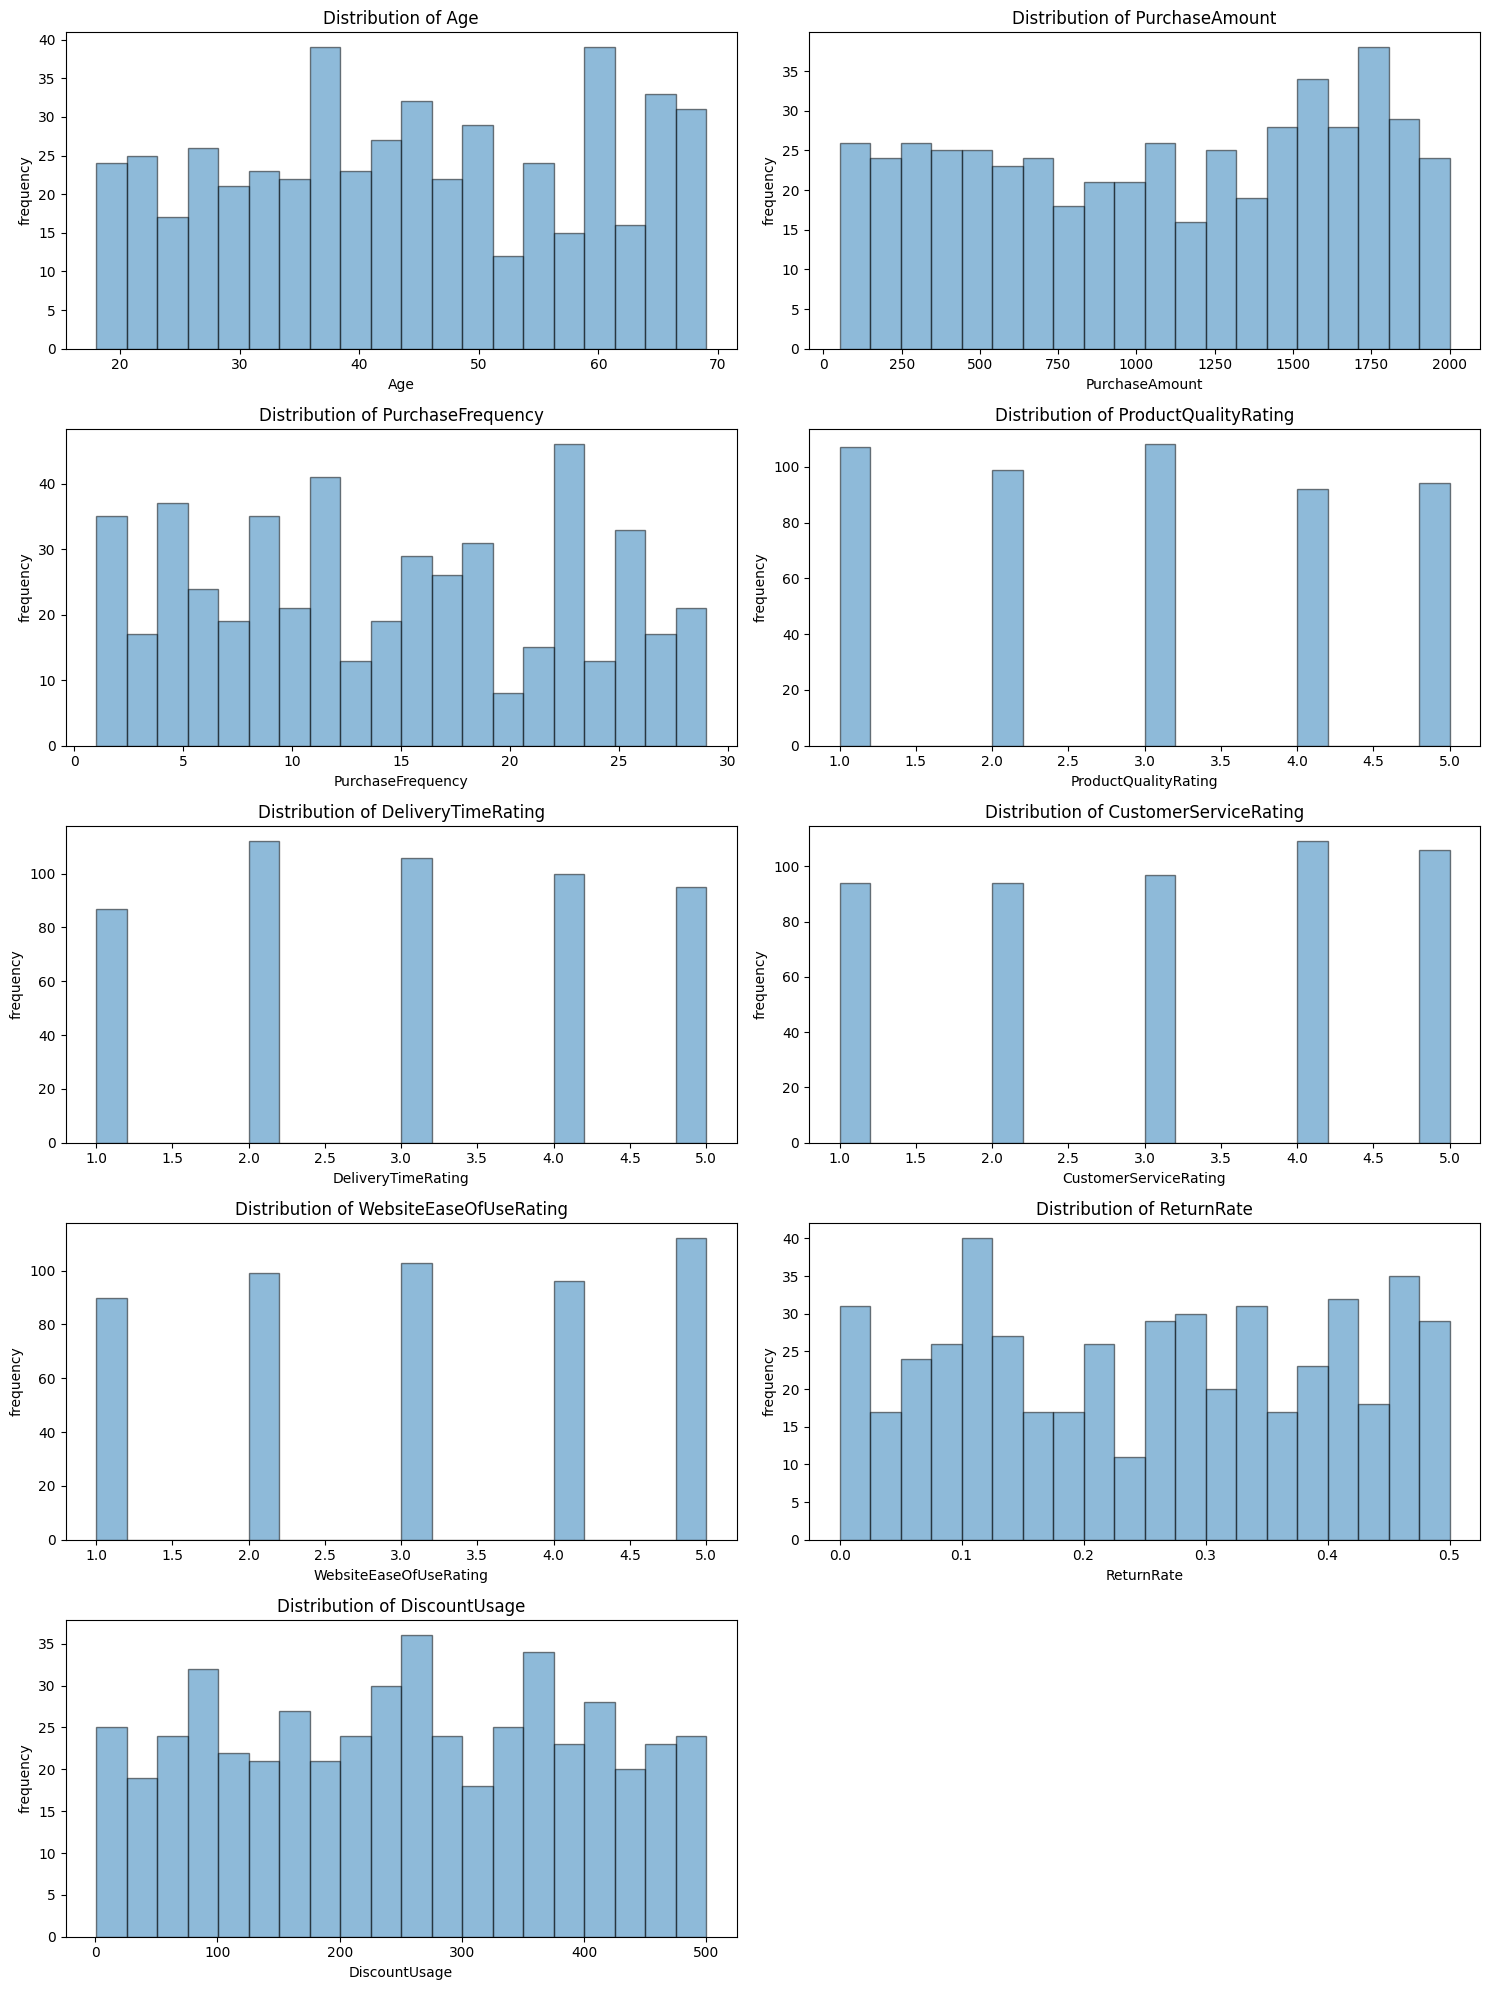

In [35]:
# Let's visualise the data for each distributions to get a better understanding of our observations. 


numeric_data_col = ['Age', 'PurchaseAmount','PurchaseFrequency', 'ProductQualityRating','DeliveryTimeRating','CustomerServiceRating','WebsiteEaseOfUseRating','ReturnRate','DiscountUsage']
plt.figure(figsize=(15,20))

for i, col in enumerate(numeric_data_col,1):
    plt.subplot(5,2,i)
    plt.hist(data[col], bins=20, edgecolor='k', alpha=0.5)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()    


    -the age distribution is relatively even with slight peaks in the 30s and 60s;
    -purchase amounts are right-skewed, indicating most customers spend less than $1000;
    -purchase frequency is varied, with notable peaks around 10 and 20 purchases;
    -satisfaction ratings for product quality, delivery time, customer service, and website ease of use show a wide distribution, with most ratings clustering around the middle values;
    -return rates are varied with peaks around 0.1 and 0.4;
    -and discount usage is evenly spread, showing no significant trend.

    These findings suggest that customer experiences and behaviours are diverse, with varying levels of satisfaction across different service aspects.

In [36]:
# Segmentation based on age, gender to understand the average satisfactory rate of customers

# create age groups
bins= [18,30,40,50,60,70]

# making labels for each intervals
labels= ['18-29', '30-39','40-49','50-59','60-69'] 

data['AgeGroup']= pd.cut(data['Age'], bins=bins, labels=labels)

# data['AgeGroup']

# taking all satisfactory distribution that are numeric for calculations
numeric_cols= ['ProductQualityRating', 'DeliveryTimeRating','CustomerServiceRating','WebsiteEaseOfUseRating']

# calculating mean of all the required distributions based on age and gender
mean_rating_age_gender = data.groupby(['AgeGroup', 'Gender'])[numeric_cols].mean()

mean_rating_age_gender.reset_index(inplace=True)
print(mean_rating_age_gender)



  AgeGroup  Gender  ProductQualityRating  DeliveryTimeRating  \
0    18-29  Female              2.950000            3.183333   
1    18-29    Male              2.891304            2.934783   
2    30-39  Female              2.927273            2.890909   
3    30-39    Male              2.980769            2.865385   
4    40-49  Female              3.140351            2.964912   
5    40-49    Male              2.947368            3.131579   
6    50-59  Female              2.829268            2.804878   
7    50-59    Male              2.940000            3.040000   
8    60-69  Female              2.940000            3.380000   
9    60-69    Male              2.590909            2.795455   

   CustomerServiceRating  WebsiteEaseOfUseRating  
0               3.216667                2.850000  
1               3.195652                3.282609  
2               2.963636                3.109091  
3               2.961538                2.846154  
4               3.122807                

C:\Users\HP\AppData\Local\Temp\ipykernel_23916\4218938333.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rating_age_gender = data.groupby(['AgeGroup', 'Gender'])[numeric_cols].mean()



    -Younger customers (18-29) generally rate product quality slightly higher.
    -Females in the 40-49 age group give the highest ratings, while males in the 60-69 age group give the lowest.
    -Delivery time satisfaction is relatively consistent across age groups, with minor variations.
    -The highest ratings for delivery time satisfaction are from females aged 60-69, while the lowest are from males aged 30-39.
    -Customer service ratings are fairly consistent, with a slight peak among younger males (18-29).
    -Males in the 60-69 age group rate customer service the lowest.


In [37]:
# Next, let’s analyze the impact of loyalty program membership on customer satisfaction:

numeric_cols = ['ProductQualityRating', 'DeliveryTimeRating', 'WebsiteEaseOfUseRating','CustomerServiceRating', 'ReturnRate', 'DiscountUsage']

# calculating mean for loyalti distibutions based on
mean_loyalty_program = data.groupby(['LoyaltyProgramMember'])[numeric_cols].mean()
mean_loyalty_program.reset_index(inplace=True)
print(mean_loyalty_program)


  LoyaltyProgramMember  ProductQualityRating  DeliveryTimeRating  \
0                   No              2.920502            2.916318   
1                  Yes              2.946360            3.091954   

   WebsiteEaseOfUseRating  CustomerServiceRating  ReturnRate  DiscountUsage  
0                3.108787               2.987448    0.251883     241.426710  
1                3.057471               3.160920    0.252644     260.113108  


The data shows mean satisfaction ratings, return rates, and discount usage for loyalty program members versus non-members. Here are the insights:

    -Product Quality Rating: Loyalty program members rate product quality slightly higher (2.95) compared to non-members (2.92).
    -Delivery Time Rating: Loyalty program members are more satisfied with delivery time (3.09) than non-members (2.92).
    -Customer Service Rating: Members rate customer service higher (3.16) compared to non-members (2.99).
    -Website Ease of Use Rating: Non-members rate the website slightly higher (3.11) than members (3.06).
    -Return Rate: The return rates are almost identical between members (0.25) and non-members (0.25).
    -Discount Usage: Members use slightly more discounts ($260) compared to non-members ($241).


In [38]:
# Calculating Net Promoter Score(NPS)
# NPS is a metric used to gauge customer loyalty and satisfaction by asking customers how likely 
# they are to recommend a company’s product or service to others on a scale of 0 to 10. Respondents are classified into three categories:

# Promoters (9-10)
# Passives (7-8)
# Detractors (0-6)

# # define NPS categories based on customer service rating
bins= [0,6,8,10]
labels= ['Detractors', 'Passives', 'Promoters']
data['NPS_category']= pd.cut(data['CustomerServiceRating'], bins=bins, labels=labels, right=False)

# data['NPS_category']

# Calculate NPS score
NPS_count = data['NPS_category'].value_counts(normalize=True)*100

print(NPS_count)

NPS_score= NPS_count['Promoters']- NPS_count['Detractors']
print(f'Net promoter score given: {NPS_score}')

# If we have more promoters than detractors, NPS is positive (good business!).
# If we have more detractors than promoters, NPS is negative (bad business).
# If NPS = 0, it means equal happy and unhappy customers (not ideal).


NPS_category
Detractors    100.0
Passives        0.0
Promoters       0.0
Name: proportion, dtype: float64
Net promoter score given: -100.0


This results in an NPS score of -100, which indicates extremely low customer satisfaction. This score is a critical indicator that significant improvements are needed in customer service to convert detractors into promoters.

# Root Cause Analysis for Low Satisfaction

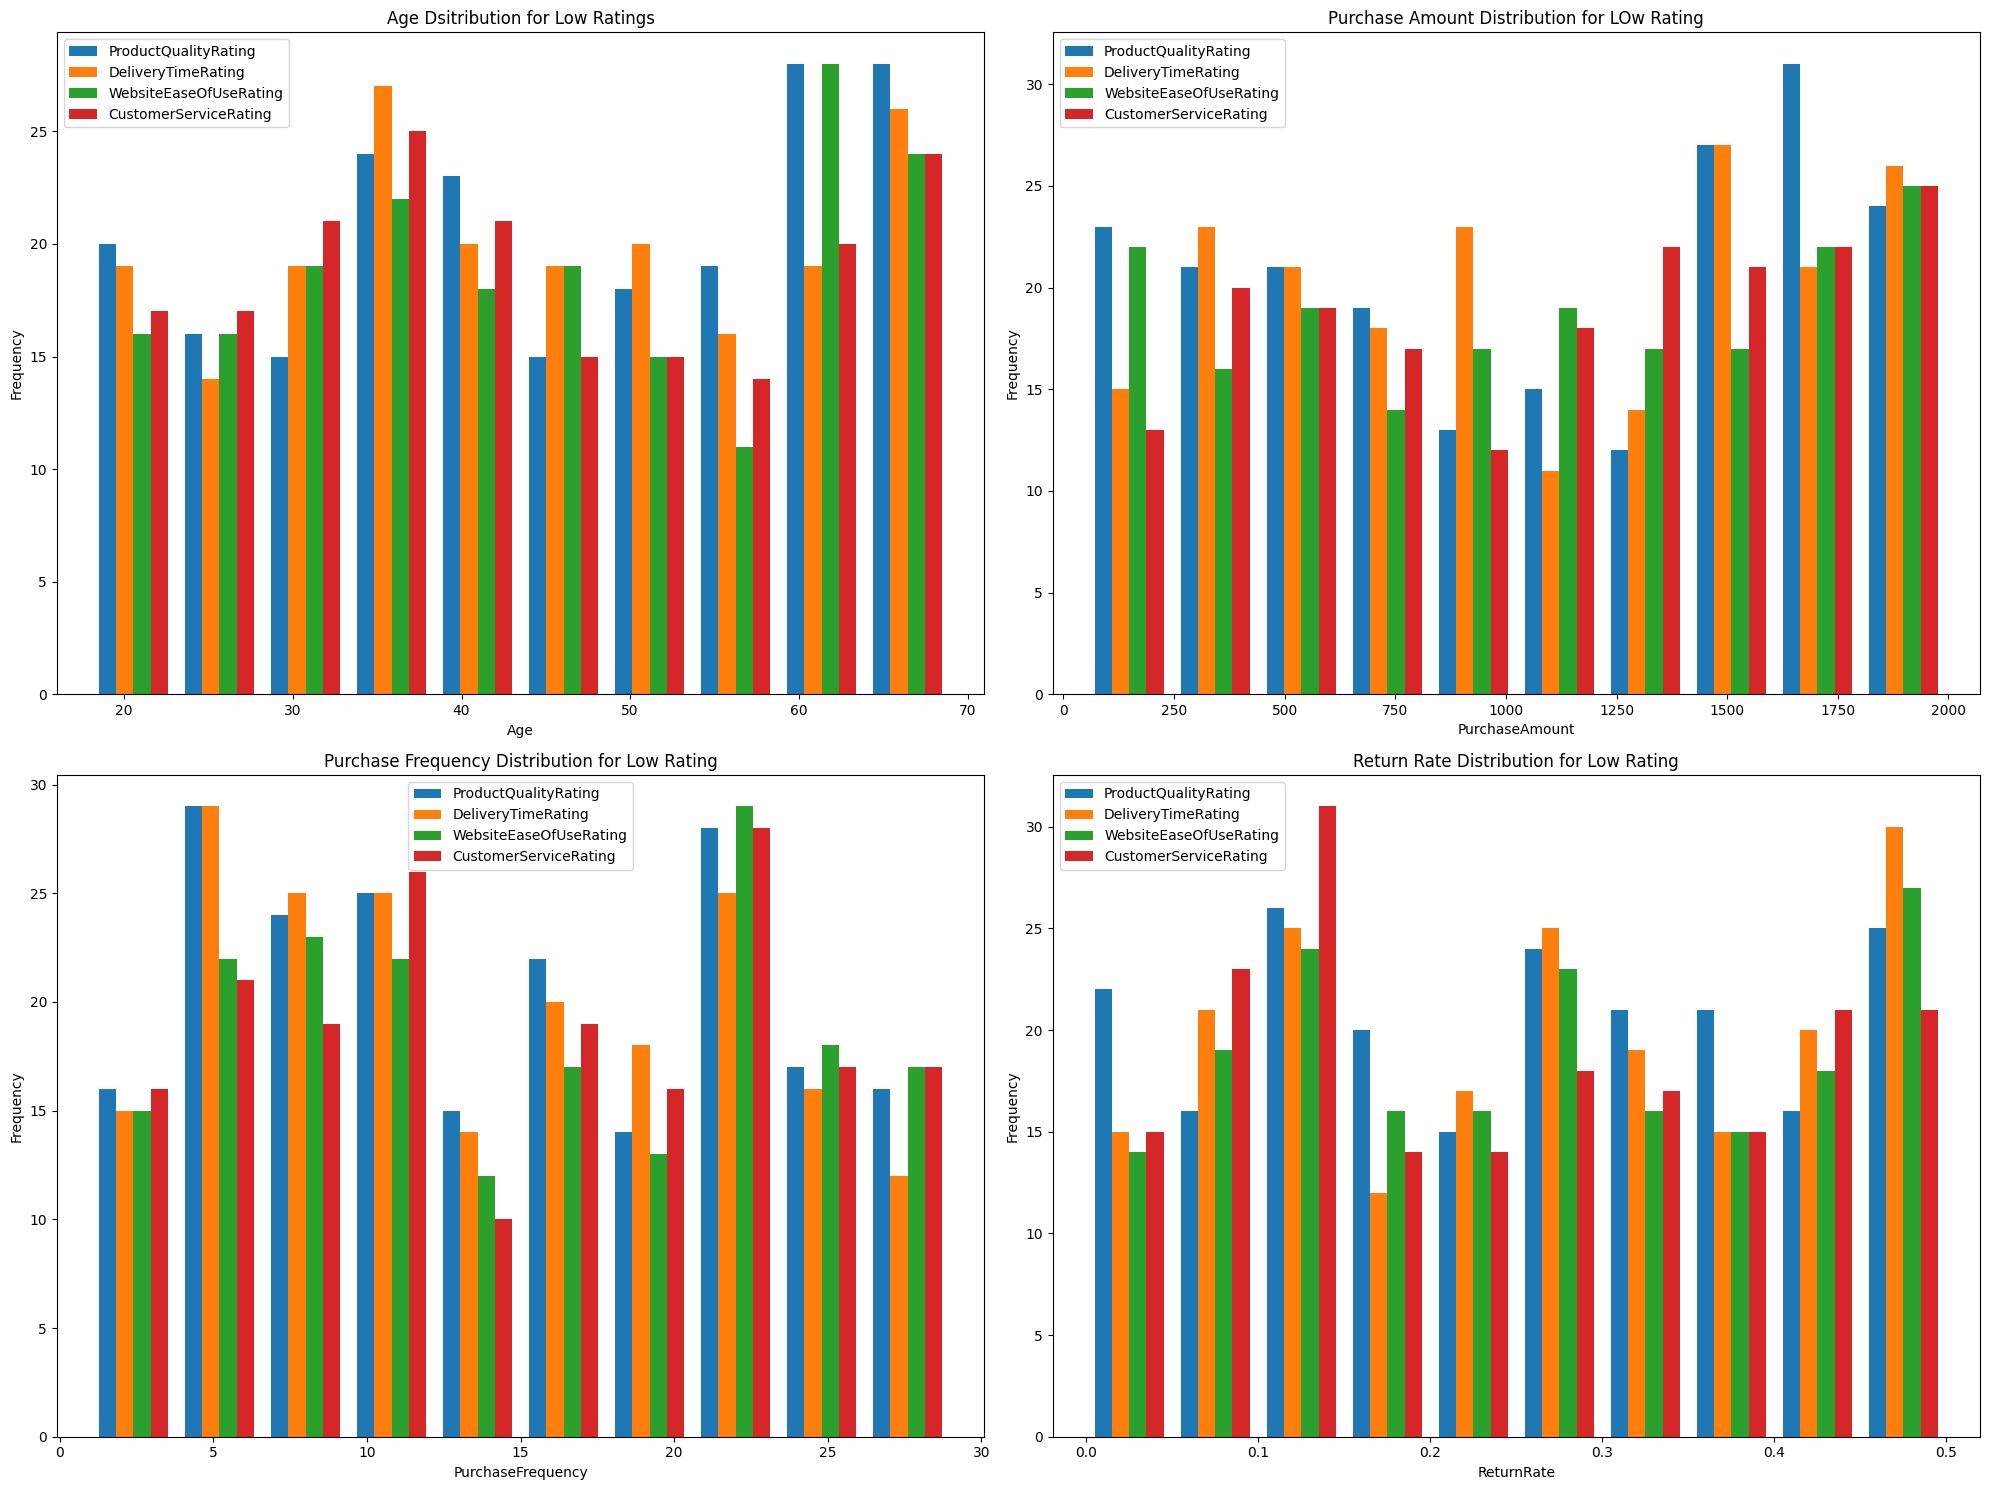

In [41]:
# Root Cause Analysis for Low Satisfaction

# data.head()

# define low rating threshold
low_rating_threshold= 2
labels = ['ProductQualityRating','DeliveryTimeRating','WebsiteEaseOfUseRating','CustomerServiceRating']

# create subsets for low ratings in different aspects
low_quality_rate = data[data['ProductQualityRating']<= low_rating_threshold]
low_delivery_rate = data[data['DeliveryTimeRating'] <= low_rating_threshold]
low_service_rate = data[data['CustomerServiceRating']<= low_rating_threshold]
low_website_rate = data[data['WebsiteEaseOfUseRating']<= low_rating_threshold]

# plot the characteristics for each low rating subset
plt.figure(figsize=(20,15))

# age distribution for low ratings
plt.subplot(2,2,1)
plt.hist([low_quality_rate['Age'], low_delivery_rate['Age'], low_service_rate['Age'], low_website_rate['Age']], bins=10 , label = labels)
plt.title(f'Age Dsitribution for Low Ratings')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# purchase amount distribution for low rating
plt.subplot(2,2,2)
plt.hist([low_quality_rate['PurchaseAmount'], low_delivery_rate['PurchaseAmount'], low_service_rate['PurchaseAmount'], low_website_rate['PurchaseAmount']], bins= 10, label=labels)
plt.title(f'Purchase Amount Distribution for LOw Rating')
plt.xlabel('PurchaseAmount')
plt.ylabel('Frequency')
plt.legend()

# purchase frequency distribution for low rating
plt.subplot(2,2,3)
plt.hist([low_quality_rate['PurchaseFrequency'], low_delivery_rate['PurchaseFrequency'], low_service_rate['PurchaseFrequency'], low_website_rate['PurchaseFrequency']],bins=10, label= labels)
plt.title(f'Purchase Frequency Distribution for Low Rating')
plt.xlabel('PurchaseFrequency')
plt.ylabel('Frequency')
plt.legend()

# return rate distribution for low rating
plt.subplot(2,2,4)
plt.hist([low_quality_rate['ReturnRate'], low_delivery_rate['ReturnRate'], low_service_rate['ReturnRate'], low_website_rate['ReturnRate']], bins=10, label= labels)
plt.title(f'Return Rate Distribution for Low Rating')
plt.xlabel('ReturnRate')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


## Key Insights from Histograms for Root Cause Analysis of Low Ratings

- **Age Distribution:**  
  - Low ratings come from a **wide age range**, with **notable peaks at ages 30-40 and 50-60**.  
  - Suggests possible **age-related dissatisfaction trends**.  

- **Purchase Amount & Frequency:**  
  - **Low ratings are not limited to low spenders or infrequent buyers**.  
  - Even **high spenders and frequent buyers express dissatisfaction**.  
  - Indicates **service quality issues** rather than spending habits.  

- **Return Rate & Low Ratings:**  
  - **Higher return rates correlate with low ratings**, especially for:  
    - **Product quality**  
    - **Website ease of use**  
  - Suggests dissatisfaction with **products and website experience**.
